# k-Customer Hierarchical Clustering
By- Rhushikesh Ugemuge 

In [3]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt # Matplotlib for Plotting
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Load the dataset
dataset=pd.read_csv('Bank-Customers.csv')
dataset.head(n=10) # Reading the first 10 rows of the dataset

,Cust_id,Age,Earning,Credit Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
5,6,22,17,76
6,7,35,18,6
7,8,23,18,94
8,9,64,19,3
9,10,30,19,72


In [11]:
dataset.info() #Checking the type of data
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cust_id       200 non-null    int64
 1   Age           200 non-null    int64
 2   Earning       200 non-null    int64
 3   Credit Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Cust_id         0
Age             0
Earning         0
Credit Score    0
dtype: int64

In [13]:
#Dropping the Cusd_id column,as this is unnecessary in the dataset
dataset.drop('Cust_id',axis=1,inplace=True) #axis=1 means removing column wise
#inplace=True means after dropping col, inorder to reflect changes in dataframe we are using inplace
dataset.head(n=10) #Again checking first 10 rows of the dataset

,Age,Earning,Credit Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [15]:
#Selecting Earning and Credit Score column as i want to do prediction on those columns and assigning to variable X
X=dataset.iloc[:,[1,2]].values

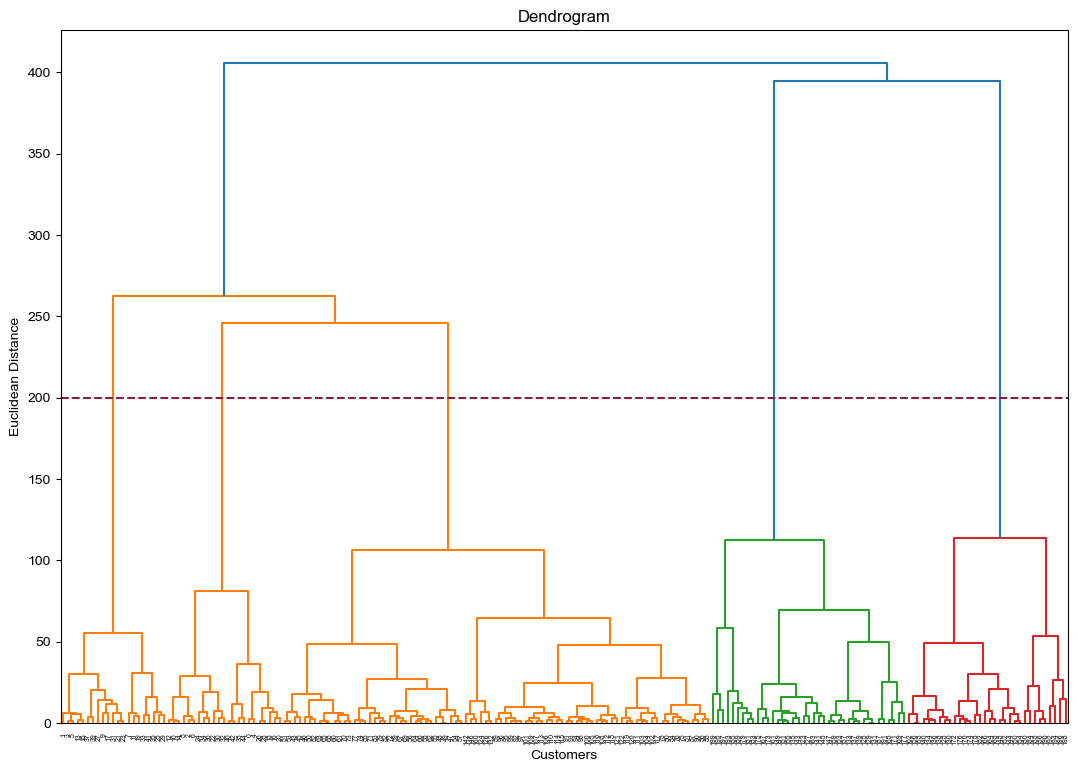

In [17]:
#Now using the dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=200, color='#851e3e', linestyle='--')
fig=plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [29]:
#Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering #importing the required library
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

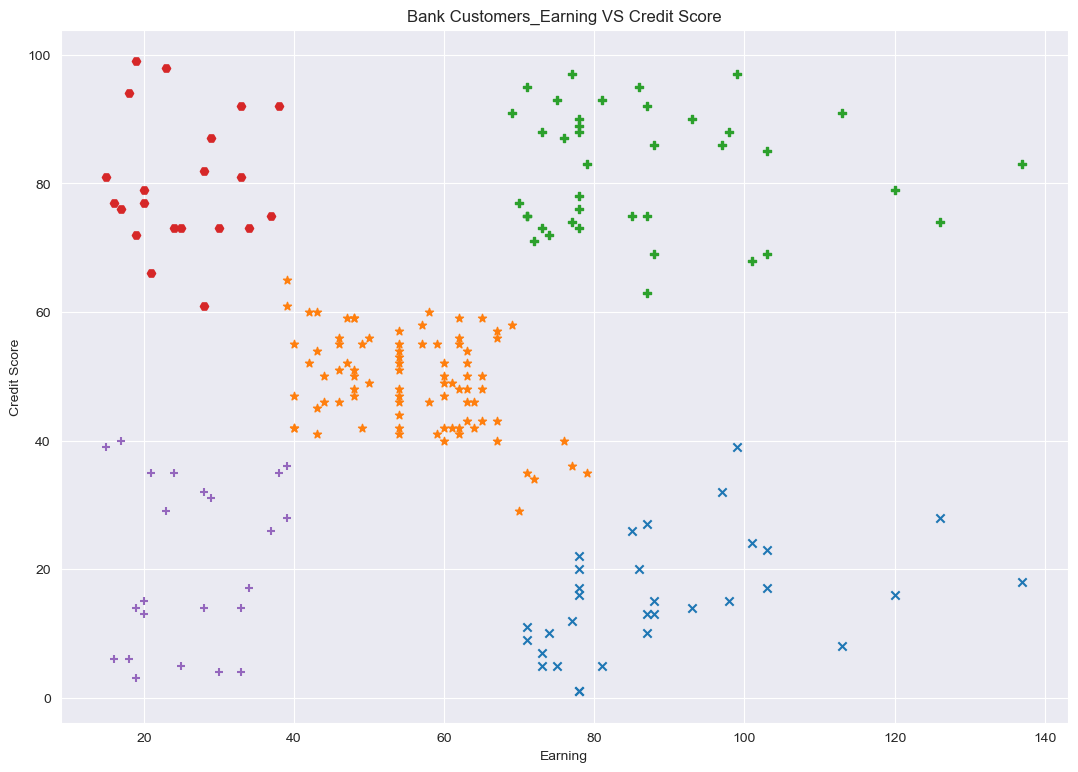

In [31]:
#Visualizing the clusters using scatter plots
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],marker='x')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],marker='*')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],marker='P')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],marker='H')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],marker='+')
plt.title('Bank Customers_Earning VS Credit Score')
fig=plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.xlabel('Earning') 
plt.ylabel('Credit Score')
plt.show()